#Storytelling - [Reserva de hoteles](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

Los canales de reserva de hoteles han experimentado un cambio significativo en la cantidad de cancelaciones de reservas por parte de los clientes. Es un hecho de que la cancelación de forma gratuita o, preferiblemente, a un bajo costo, es beneficioso para los huéspedes del hotel, pero es un factor menos deseable y que posiblemente disminuya los ingresos para los hoteles.

El área de Data & Analytics de una empresa de reserva de hoteles busca encontrar las características en común de aquellos clientes que cancelan las reservas mediante el análisis exploratorio de datos y sus respectivas visualizaciones. Además (para más adelante) se buscará predecir que clientes podrían realizar una cancelación en la reserva solicitada a partir de algoritmos de machine learning.

El equipo de contabilidad nos ha proporcionado datos sobre todas las reservas realizadas por 36275 personas para los años 2017 y 2018.

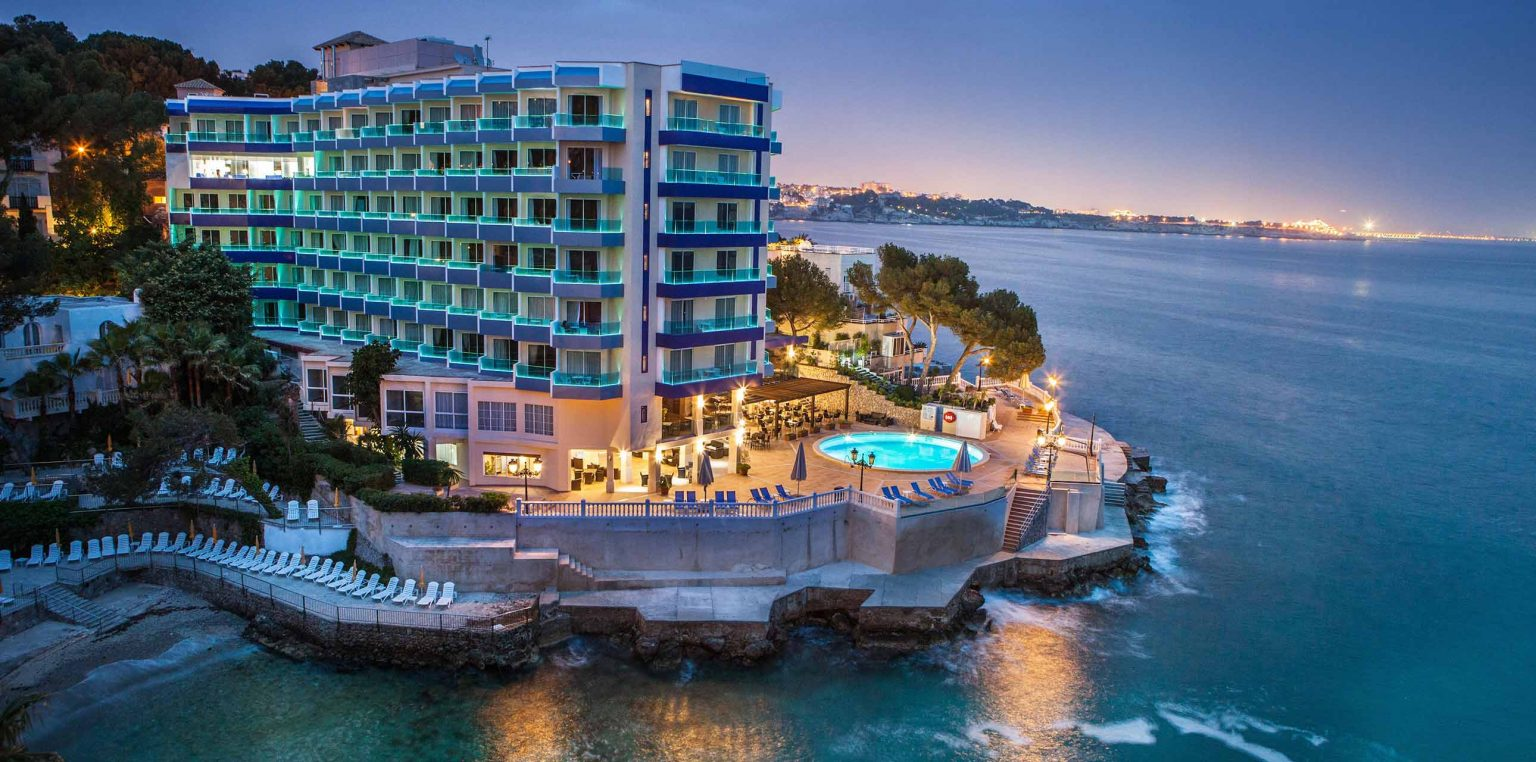

In [50]:
# Importo las librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [51]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
#%cd '/content/gdrive/MyDrive/Coderhouse/Data Science/Entregas/Primer desafio/Datasets/' # Este comando (%cd) me funcionó la primera vez y después dejó de funcionar.
os.chdir('/content/gdrive/MyDrive/Coderhouse/Data Science/Entregas/Primer desafio/Datasets/') # Cambio de directorio con el método chdir de os

In [53]:
os.getcwd() # Chequeo path del directorio actual

'/content/gdrive/MyDrive/Coderhouse/Data Science/Entregas/Primer desafio/Datasets'



## **Descripción del Dataset**
#####El dataset se compone de 36275 filas y 18 columnas, sin contar la columna Booking_ID que se utilizará como índice del DataFrame.

####**Indice**:

*   Booking_ID: Identificador único para cada reserva

####**Columnas**:

*   no_of_adults: Número de adultos asociados en la reserva.
*   no_of_children: Número de menores de edad asociados a la reserva.
*   no_of_weekend_nights: Número de noches de fin de semana asociado a la reserva.
*   no_of_week_nights: Número de noches de día de semana asociado a la reserva.
*   type_of_meal_plan: Tipo de plan de comidas elegido por el usuario.
*   required_car_parking_space: El ususario contrató servicio de parking? (0 - No, 1- Si).
*   room_type_reserved: Tipo de habitación contratada.
*   lead_time: Número de días entre la fecha de reserva y la fecha de llegada al hotel.
*   arrival_year: Año de llegada.
*   arrival_month: Mes de llegada.
*   arrival_date: Día de llegada.
*   market_segment_type: Designación de segmento de mercado (si la reserva fue hecha online, offline u otros).
*   repeated_guest: Si el usuario es un huesped repetido (0 - No, 1- Si)
*   no_of_previous_cancellations: Número de cancelaciones previas.
*   no_of_previous_bookings_not_canceled: Número de reservas previas que no fueron canceladas por el usuario.
*   avg_price_per_room: Prcio promedio por habitación.
*   no_of_special_requests: Número de solicitudes especiales realizadas por el usuario.
*   booking_status: Estado de la reserva (Cancelada, No cancelada).














In [54]:
df_reserva_hoteles = pd.read_csv('Hotel Reservations.csv', index_col=0) # Asocio el Booking ID al índice del DataFrame

In [55]:
df_reserva_hoteles.describe().round(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


##Objetivos


Realizar un análisis exploratorio de los datos para investigar visualmente la estructura de los datos y conocer si hay diferencia en aquellos usuarios que realizan cancelaciones en las reservas vs los usuarios que no realizan cancelaciones.

Responder las siguientes preguntas:



1.   ¿Hay un aumento de reservas con el tiempo? ¿Que porcentaje de reservas fueron canceladas por año?
2.   ¿El precio promedio por habitación es mayor en las reservas canceladas que en aquellas que se concretan?
1.   ¿Se observan datos anomalos (Outliers)?
1.   ¿Las reservas son en la mayoría hechas por familias o  por parejas sin niños?
2. ¿Existen huespedes que ya hayan cancelado previamente?
2.   ¿Se podrían detectar que reservas podrían ser canceladas y cuales no? Esta pregunta se responderá más adelante con los algoritmos de machine learning.






## Análisis Exploratorio de Datos

In [56]:
plt.style.use('Solarize_Light2')

### Evolución de las reservas en el año 2017 y 2018

In [57]:
# Realizo una Serie para contar los valores por año y los ordeno por el índice de la Serie (es decir, por año)
arribos_por_anio = df_reserva_hoteles.arrival_year.value_counts().sort_index() # Devuelve un objeto de tipo Serie
# Realizo una Serie para contar los valores por mes y los ordeno por el índice de la Serie (es decir, por mes)
arribo_por_mes = df_reserva_hoteles.arrival_month.value_counts().sort_index()
# arribo_por_mes.rename(index={1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'}, inplace=True)
arribo_por_mes.rename(index={1:'Ene', 2:'Feb', 3:'Mar', 4:'Abr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dic'}, inplace=True)

In [58]:
# Filtro el DataFrame original por el año 2017 y 2018 y los guardo en otros dos para luego gráficar la cantidad de reservas por año con pyplot.

df_reserva_hoteles_2017 = df_reserva_hoteles.loc[df_reserva_hoteles['arrival_year'] == 2017, :] # Filtro por el año 2017
df_reserva_hoteles_2018 = df_reserva_hoteles.loc[df_reserva_hoteles['arrival_year'] == 2018, :] # Filtro por el año 2018
arribo_por_mes_2017 = df_reserva_hoteles_2017.arrival_month.value_counts().sort_index() # Esto me devuelve una Serie
arribo_por_mes_2018 = df_reserva_hoteles_2018.arrival_month.value_counts().sort_index() # Esto me devuelve una Serie

# A continuación le cambio los índices a la serie para que sea más legible
arribo_por_mes_2017.rename(index={1:'Ene', 2:'Feb', 3:'Mar', 4:'Abr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dic'}, inplace=True)
arribo_por_mes_2018.rename(index={1:'Ene', 2:'Feb', 3:'Mar', 4:'Abr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dic'}, inplace=True)

In [59]:
# Calculo nunericamente la cantidad y porcentaje de las reservas que fueron canceladas y de aquellas que no fueron canceladas.

cantidad_reservas_no_canceladas = df_reserva_hoteles.booking_status.value_counts()[0]
cantidad_reservas_canceladas = df_reserva_hoteles.booking_status.value_counts()[1]
porcenaje_reservas_no_canceladas = (df_reserva_hoteles.booking_status.value_counts()[0]*100/(cantidad_reservas_no_canceladas+cantidad_reservas_canceladas)).round(2)
porcenaje_reservas_canceladas = (df_reserva_hoteles.booking_status.value_counts()[1]*100/(cantidad_reservas_no_canceladas+cantidad_reservas_canceladas)).round(2)

print(f'La cantidad de reservas canceladas es de {cantidad_reservas_canceladas} ({porcenaje_reservas_canceladas}%)\nLa cantidad de reservas no canceladas es de {cantidad_reservas_no_canceladas} ({porcenaje_reservas_no_canceladas}%)')

La cantidad de reservas canceladas es de 11885 (32.76%)
La cantidad de reservas no canceladas es de 24390 (67.24%)


In [60]:
# En el siguiente bloque se calcula el porcentaje de reservas canceladas en el año 2017 y 2018

cantidad_reservas_canceladas_anio_2017 = df_reserva_hoteles.loc[(df_reserva_hoteles['arrival_year'] == 2017) & (df_reserva_hoteles['booking_status'] == 'Canceled'), ['booking_status']].count()
cantidad_reservas_canceladas_anio_2018 = df_reserva_hoteles.loc[(df_reserva_hoteles['arrival_year'] == 2018) & (df_reserva_hoteles['booking_status'] == 'Canceled'), ['booking_status']].count()

cantidad_total_reservas_anio_2017 = df_reserva_hoteles_2017.booking_status.count()
cantidad_total_reservas_anio_2018 = df_reserva_hoteles_2018.booking_status.count()

porcentaje_reservas_canceladas_2017 = round(100*cantidad_reservas_canceladas_anio_2017/cantidad_total_reservas_anio_2017, 2)
porcentaje_reservas_canceladas_2018 = round(100*cantidad_reservas_canceladas_anio_2018/cantidad_total_reservas_anio_2018, 2)
print(f'El porcenaje de reservas canceladas en el 2017 fue del {porcentaje_reservas_canceladas_2017[0]} % y en el 2018 del {porcentaje_reservas_canceladas_2018[0]} %, por lo que hubo un aumento en las cancelaciones del {porcentaje_reservas_canceladas_2018[0]-porcentaje_reservas_canceladas_2017[0]} %')

El porcenaje de reservas canceladas en el 2017 fue del 14.75 % y en el 2018 del 36.71 %, por lo que hubo un aumento en las cancelaciones del 21.96 %


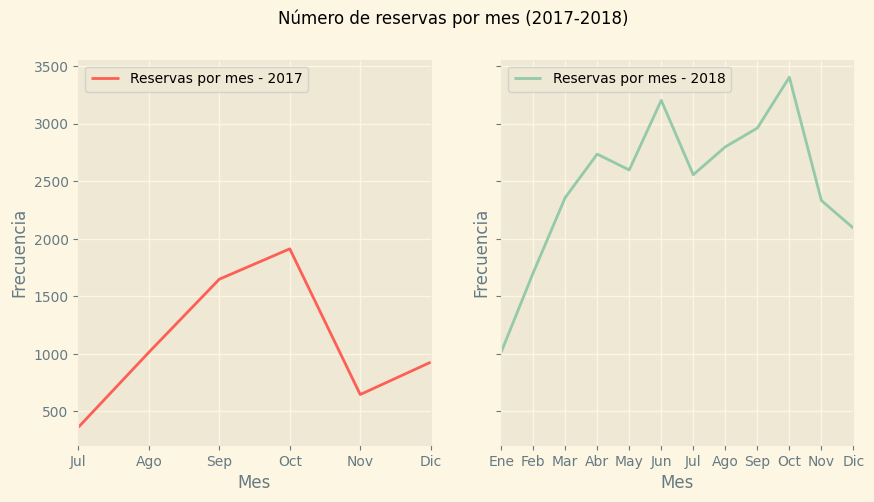

Se puede observar que en el 2018 aumentaron la cantidad de reservas para cada mes en comparación del año 2017.
Además, no hay datos en los meses previos a Julio para el año 2017.
El mes con mayor cantidad de reservas, tanto para 2017 y 2018 es octubre


In [61]:
# Realizo las gráficas con el método ortientado a objetos de matplotlib. En particular de un lineplot por año de frecuencia de reservas vs mes.

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
plt.suptitle('Número de reservas por mes (2017-2018)')
ax[0].plot(arribo_por_mes_2017.index.astype('str'), arribo_por_mes_2017, color='#fe5f55', label='Reservas por mes - 2017')
ax[1].plot(arribo_por_mes_2018.index.astype('str'), arribo_por_mes_2018, color='#94c9a9', label='Reservas por mes - 2018')
# ax[0].set_title('N° de reservas por mes (2017)')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlabel('Mes')
ax[0].legend(loc='upper left');
ax[0].set_xlim(arribo_por_mes_2017.index.astype('str')[0], arribo_por_mes_2017.index.astype('str')[-1])
# ax[1].set_title('N° de reservas por mes (2018)')
ax[1].set_ylabel('Frecuencia')
ax[1].set_xlabel('Mes')
ax[1].legend(loc='upper left');
ax[1].set_xlim(arribo_por_mes_2018.index.astype('str')[0], arribo_por_mes_2018.index.astype('str')[-1])
plt.show()

print('Se puede observar que en el 2018 aumentaron la cantidad de reservas para cada mes en comparación del año 2017.\nAdemás, no hay datos en los meses previos a Julio para el año 2017.\nEl mes con mayor cantidad de reservas, tanto para 2017 y 2018 es octubre')

Hay muchas más reservas no canceladas que canceladas. 
Importante a tener en cuenta para los algoritmos de 
machine learning ya que los datos de la variable objetivo 
están desbalanceados.



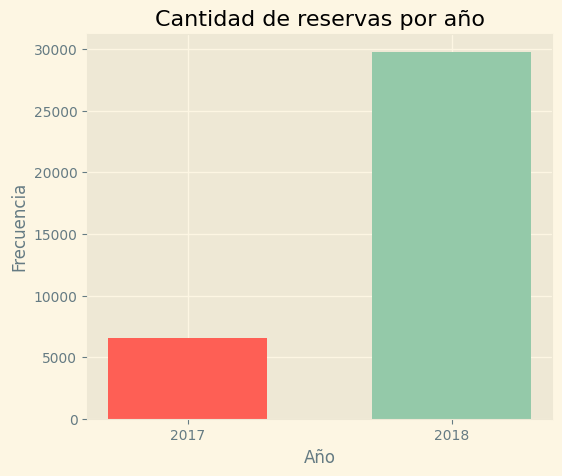

In [62]:
fig, ax = plt.subplots(figsize=(6,5))

ax.bar(arribos_por_anio.index.astype('str'), arribos_por_anio, color=['#fe5f55', '#94c9a9'], width=0.6)
ax.set_title('Cantidad de reservas por año')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Año');
print('Hay muchas más reservas no canceladas que canceladas. \nImportante a tener en cuenta para los algoritmos de \nmachine learning ya que los datos de la variable objetivo \nestán desbalanceados.\n')

En el gráfico de "Cantidad de reservas por mes", si tiene en cuenta los años 2017 y 2018 en conjunto se puede
observar que hay una tendencia alcista desde enero hasta el mes de octubre y para noviembre empieza a decaer.



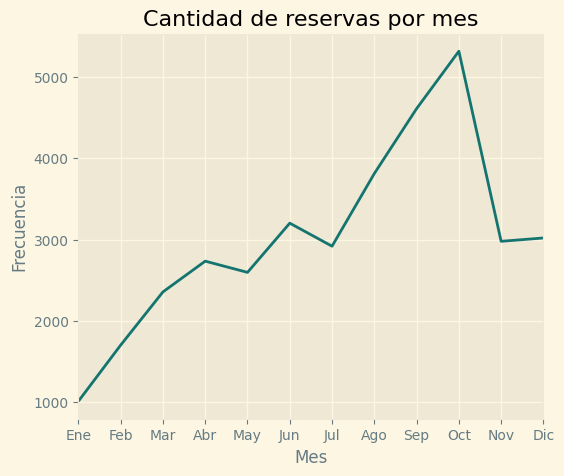

In [63]:
# Genero una matriz de tipo fig, con dos filas y dos columnas
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(arribo_por_mes.index.astype('str'), arribo_por_mes, color='#14746f', label='Número de reservas por mes')
ax.set_title('Cantidad de reservas por mes')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Mes')
# ax.legend(loc='upper left');
ax.set_xlim(arribo_por_mes.index.astype('str')[0], arribo_por_mes.index.astype('str')[-1]);

print('En el gráfico de "Cantidad de reservas por mes", si tiene en cuenta los años 2017 y 2018 en conjunto se puede\nobservar que hay una tendencia alcista desde enero hasta el mes de octubre y para noviembre empieza a decaer.\n')

### Distribución de variables continuas y datos anómalos (Outliers)

Al cuantificar la cantidad de datos anómalos de las variables continuas, se contabilizaron:


*   1696 (4.68%) registros anómalos asociados a la variable precio promdedio por habitación
*   1331 (3.67%) registros anómalos asociados a la variable reserva de tiempo de entrega o lead time

Como el porcentaje de los datos anómalos es relativamente chico respecto al total de registros, se decidió no excluir estos registros del análisis.



Analizando el histograma, se puede ver que la diferencia entre la fecha de llegada y la fecha de reserva puede llegar 
a valores de 400 en los casos extremos. Sin embargo, la mayor concentración de los datos se encuentra para valores menores a 100. 
El máximo se observa entre 0 y 20 días.



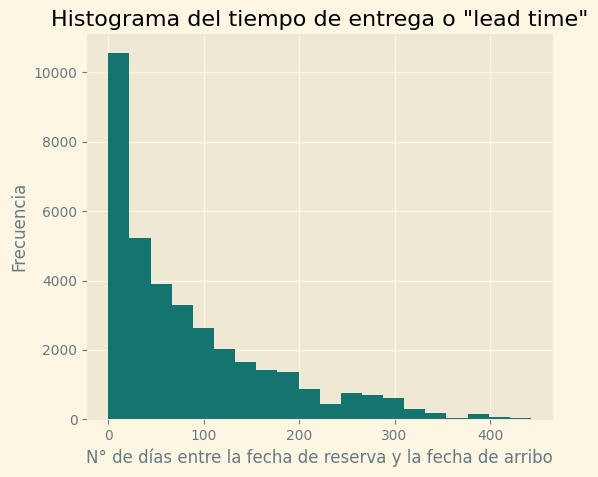

In [64]:
fig, ax = plt.subplots(figsize=(6,5))

ax.hist(df_reserva_hoteles['lead_time'].values.flatten(), bins=20, color='#14746f')
ax.set_title('Histograma del tiempo de entrega o "lead time"')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('N° de días entre la fecha de reserva y la fecha de arribo');

print('Analizando el histograma, se puede ver que la diferencia entre la fecha de llegada y la fecha de reserva puede llegar \na valores de 400 en los casos extremos. Sin embargo, la mayor concentración de los datos se encuentra para valores menores a 100. \nEl máximo se observa entre 0 y 20 días.\n')

<!-- ### Visualizaciones -->

En el boxplot de precio promedio por habitación se observan precios promedios de habitación con una mediana igual a 99.45 euros. 
El primer cuantil (25%) es 80.3 euros y el tercer cuantil 120.0 euros


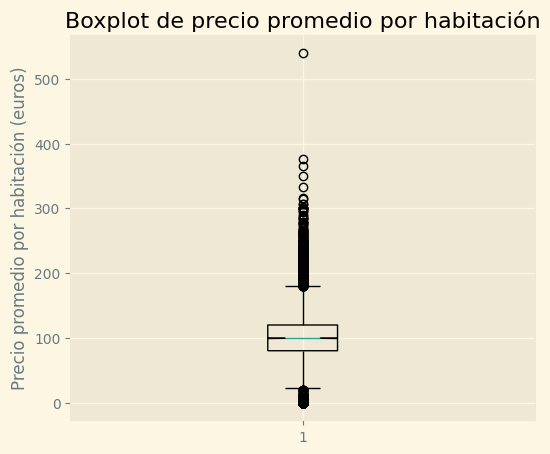

In [65]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(df_reserva_hoteles['avg_price_per_room'].values, notch=True)
ax.set_ylabel('Precio promedio por habitación (euros)')
ax.set_title('Boxplot de precio promedio por habitación');

print(f'En el boxplot de precio promedio por habitación se observan precios promedios de habitación con una mediana igual a {np.median(df_reserva_hoteles.avg_price_per_room.values)} euros. \nEl primer cuantil (25%) es {df_reserva_hoteles.avg_price_per_room.quantile(.25)} euros y el tercer cuantil {df_reserva_hoteles.avg_price_per_room.quantile(.75)} euros')

En el boxplot de reserva de tiempo de entrega o lead time se observan valores con una mediana igual a 57. 
El primer cuantil (25%) es 17  y el tercer cuantil 126


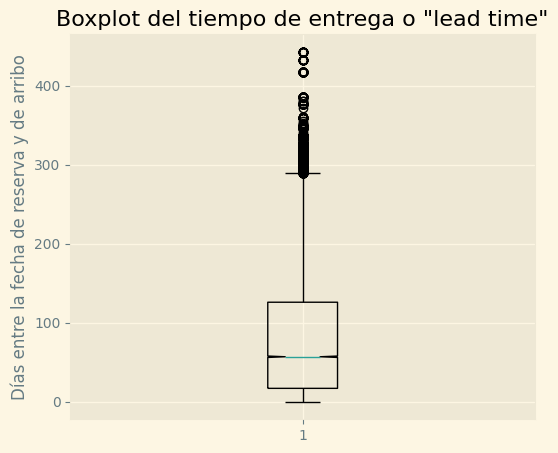

In [66]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(df_reserva_hoteles['lead_time'].values, notch=True)
ax.set_ylabel('Días entre la fecha de reserva y de arribo')
ax.set_title('Boxplot del tiempo de entrega o "lead time"');

print(f'En el boxplot de reserva de tiempo de entrega o lead time se observan valores con una mediana igual a {int(np.median(df_reserva_hoteles.lead_time.values))}. \nEl primer cuantil (25%) es {int(df_reserva_hoteles.lead_time.quantile(.25))}  y el tercer cuantil {int(df_reserva_hoteles.lead_time.quantile(.75))}')

In [67]:
def contar_outliers(dataframe):
    outliers = {}
    for columna in ['lead_time', 'avg_price_per_room']:
        if np.issubdtype(dataframe[columna].dtype, np.number):  # Comprueba si la columna es numérica
            q1 = dataframe[columna].quantile(0.25)
            q3 = dataframe[columna].quantile(0.75)
            rango_intercuartilico = q3 - q1
            limite_inferior = q1 - 1.5 * rango_intercuartilico
            limite_superior = q3 + 1.5 * rango_intercuartilico
            outliers[columna] = len(dataframe[(dataframe[columna] < limite_inferior) | (dataframe[columna] > limite_superior)])
    return outliers

In [68]:
contar_outliers(df_reserva_hoteles)

{'lead_time': 1331, 'avg_price_per_room': 1696}

In [69]:
outliers_por_variable = contar_outliers(df_reserva_hoteles)
print(f'El porcentaje de outliers de la variable precio promdedio por habitación es de: {round(outliers_por_variable["avg_price_per_room"]/df_reserva_hoteles.shape[0]*100,2)}%')
print(f'El porcentaje de outliers de la variable reserva de tiempo de entrega o lead time es de: {round(outliers_por_variable["lead_time"]/df_reserva_hoteles.shape[0]*100,2)}%')


El porcentaje de outliers de la variable precio promdedio por habitación es de: 4.68%
El porcentaje de outliers de la variable reserva de tiempo de entrega o lead time es de: 3.67%


In [70]:
# Separo el DataFrame original en dos, uno por las reservas canceladas y otro para las reservas No canceladas

df_reserva_hoteles_No_Cancelados = df_reserva_hoteles.loc[df_reserva_hoteles['booking_status'] == 'Not_Canceled', :]
df_reserva_hoteles_Cancelados = df_reserva_hoteles.loc[df_reserva_hoteles['booking_status'] == 'Canceled', :]
mediana_avg_precio_habitacion_No_Cancelado = np.median(df_reserva_hoteles_No_Cancelados.avg_price_per_room.values)
mediana_avg_precio_habitacion_Cancelado = np.median(df_reserva_hoteles_Cancelados.avg_price_per_room.values)

In [71]:
print('El promedio de pedidos especiales para las reservas no canceladas es: ', round(df_reserva_hoteles_No_Cancelados.no_of_special_requests.mean(), 2))
print('El promedio de pedidos especiales para las reservas no canceladas es: ', round(df_reserva_hoteles_Cancelados.no_of_special_requests.mean(),2))

El promedio de pedidos especiales para las reservas no canceladas es:  0.76
El promedio de pedidos especiales para las reservas no canceladas es:  0.33


Se observa en el histograma y en el boxplot que la mediana del precio promedio por habitación
para las reservas canceladas está corrida a la derecha con respecto la mediana correspondiente
a las reservas no canceladas.
Valor para la mediana en el caso de que la reserva no haya sido cancelada: 95.0
Valor para la mediana en el caso de que la reserva si haya sido cancelada: 108.0


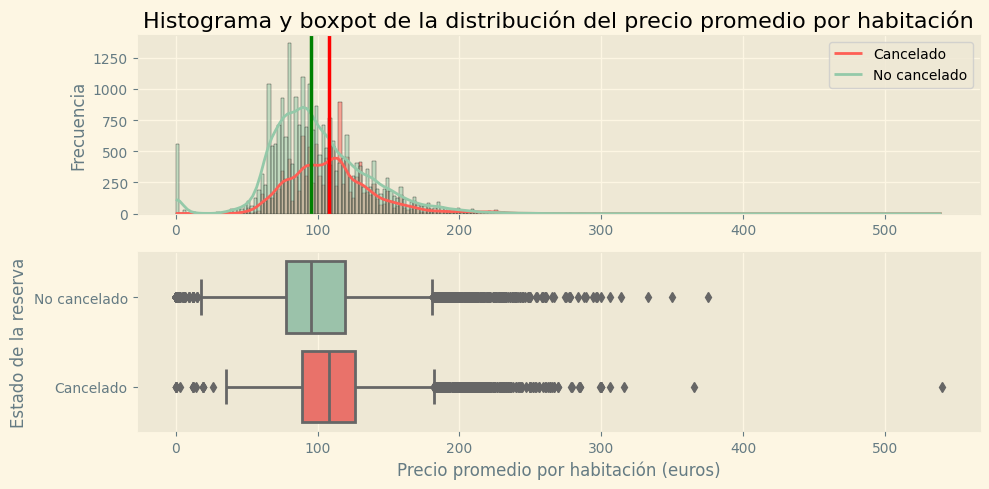

In [72]:
f, axs = plt.subplots(2, 1, figsize=(10, 5))
ax1 = sns.histplot(data=df_reserva_hoteles, x='avg_price_per_room', hue='booking_status', kde=True, palette=['#94c9a9', '#fe5f55'], ax=axs[0])
# Ploteo una línea vertical en la de las medianas calculadas.
ax1.axvline(x=mediana_avg_precio_habitacion_No_Cancelado, color='g', linewidth=2.5)
ax1.axvline(x=mediana_avg_precio_habitacion_Cancelado, color='r', linewidth=2.5)
ax2 = sns.boxplot(data=df_reserva_hoteles, x='avg_price_per_room', y='booking_status', palette=['#94c9a9', '#fe5f55'], ax=axs[1])
ax1.set(xlabel=None, ylabel='Frecuencia', title= 'Histograma y boxpot de la distribución del precio promedio por habitación')
ax2.set(xlabel='Precio promedio por habitación (euros)', ylabel='Estado de la reserva', yticklabels=['No cancelado', 'Cancelado'])
ax1.legend(labels=['Cancelado', 'No cancelado'])



f.tight_layout()
f.show()
print(f'Se observa en el histograma y en el boxplot que la mediana del precio promedio por habitación\npara las reservas canceladas está corrida a la derecha con respecto la mediana correspondiente\na las reservas no canceladas.')
print(f"Valor para la mediana en el caso de que la reserva no haya sido cancelada: {mediana_avg_precio_habitacion_No_Cancelado}\nValor para la mediana en el caso de que la reserva si haya sido cancelada: {mediana_avg_precio_habitacion_Cancelado}")

### Análisis de otras variables categóricas

In [73]:
# Analizo las variables categoricas mediantes barplots

df_reserva_hoteles.select_dtypes(include=['object']).columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

Se observa que la mayoría de los usuarios eligen el tipo de comida del plan 1 y contratan habitaciones de tipo 1, siendo la reservación 
mayormente online. Por ultimo, se observa lo mencionado previamente de la gran cantidad de reservas canceladas en el grafico de barras.



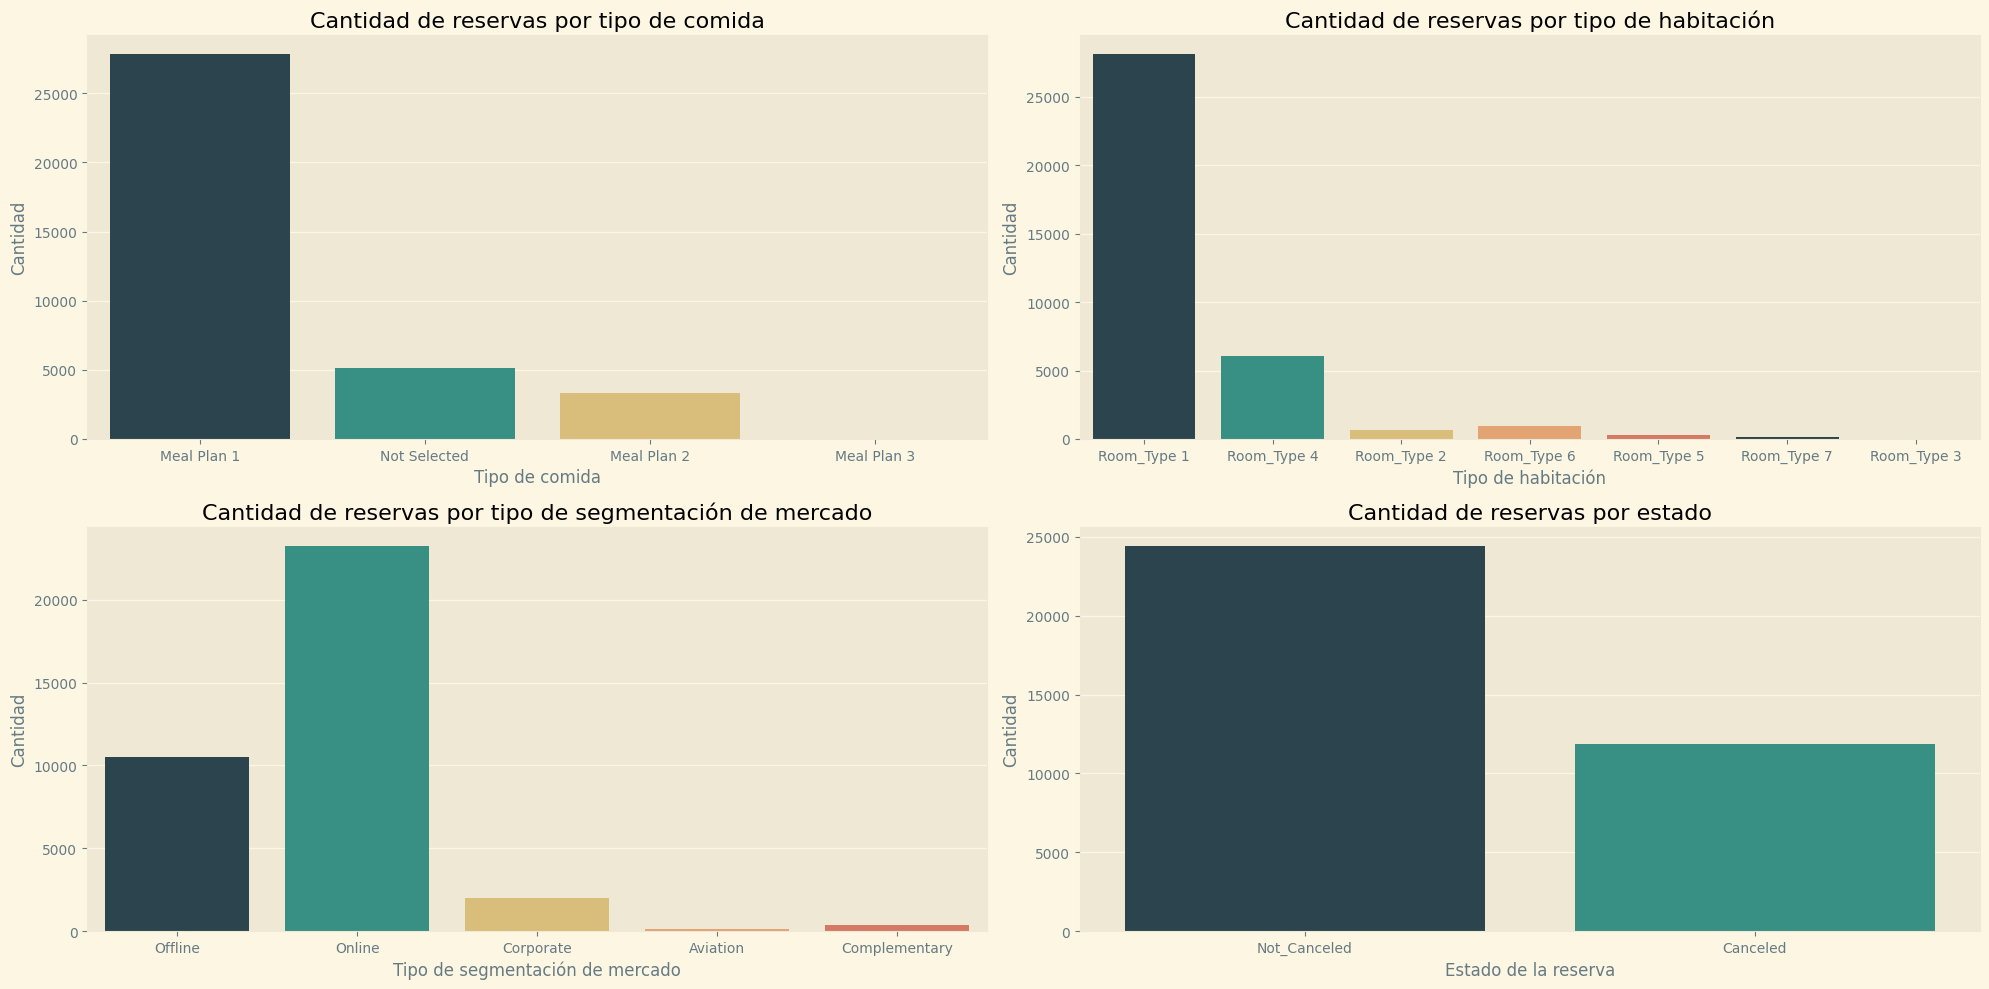

In [74]:
paleta_colores = ['#264653', '#2a9d8f','#e9c46a', '#f4a261', '#e76f51']
f, axs = plt.subplots(2, 2, figsize=(20, 10))

a1 = sns.countplot(data=df_reserva_hoteles, x='type_of_meal_plan', palette=paleta_colores, ax=axs[0,0])
a2 = sns.countplot(data=df_reserva_hoteles, x='room_type_reserved', palette=paleta_colores, ax=axs[0,1])
a3 = sns.countplot(data=df_reserva_hoteles, x='market_segment_type', palette=paleta_colores, ax=axs[1,0])
a4 = sns.countplot(data=df_reserva_hoteles, x='booking_status', palette=paleta_colores, ax=axs[1,1])

a1.set(title='Cantidad de reservas por tipo de comida', xlabel='Tipo de comida', ylabel='Cantidad')
a2.set(title='Cantidad de reservas por tipo de habitación', xlabel='Tipo de habitación', ylabel='Cantidad')
a3.set(title='Cantidad de reservas por tipo de segmentación de mercado', xlabel='Tipo de segmentación de mercado', ylabel='Cantidad')
a4.set(title='Cantidad de reservas por estado', xlabel='Estado de la reserva', ylabel='Cantidad')

f.tight_layout()
f.show()
print('Se observa que la mayoría de los usuarios eligen el tipo de comida del plan 1 y contratan habitaciones de tipo 1, siendo la reservación \nmayormente online. Por ultimo, se observa lo mencionado previamente de la gran cantidad de reservas canceladas en el grafico de barras.\n')

La mayor parte de los huéspedes alquilan habitaciones para dos adultos y sin chicos. 
Existen relativamente pocos registros de reservas con chicos. 
La estadía no suele superar más de una semana.



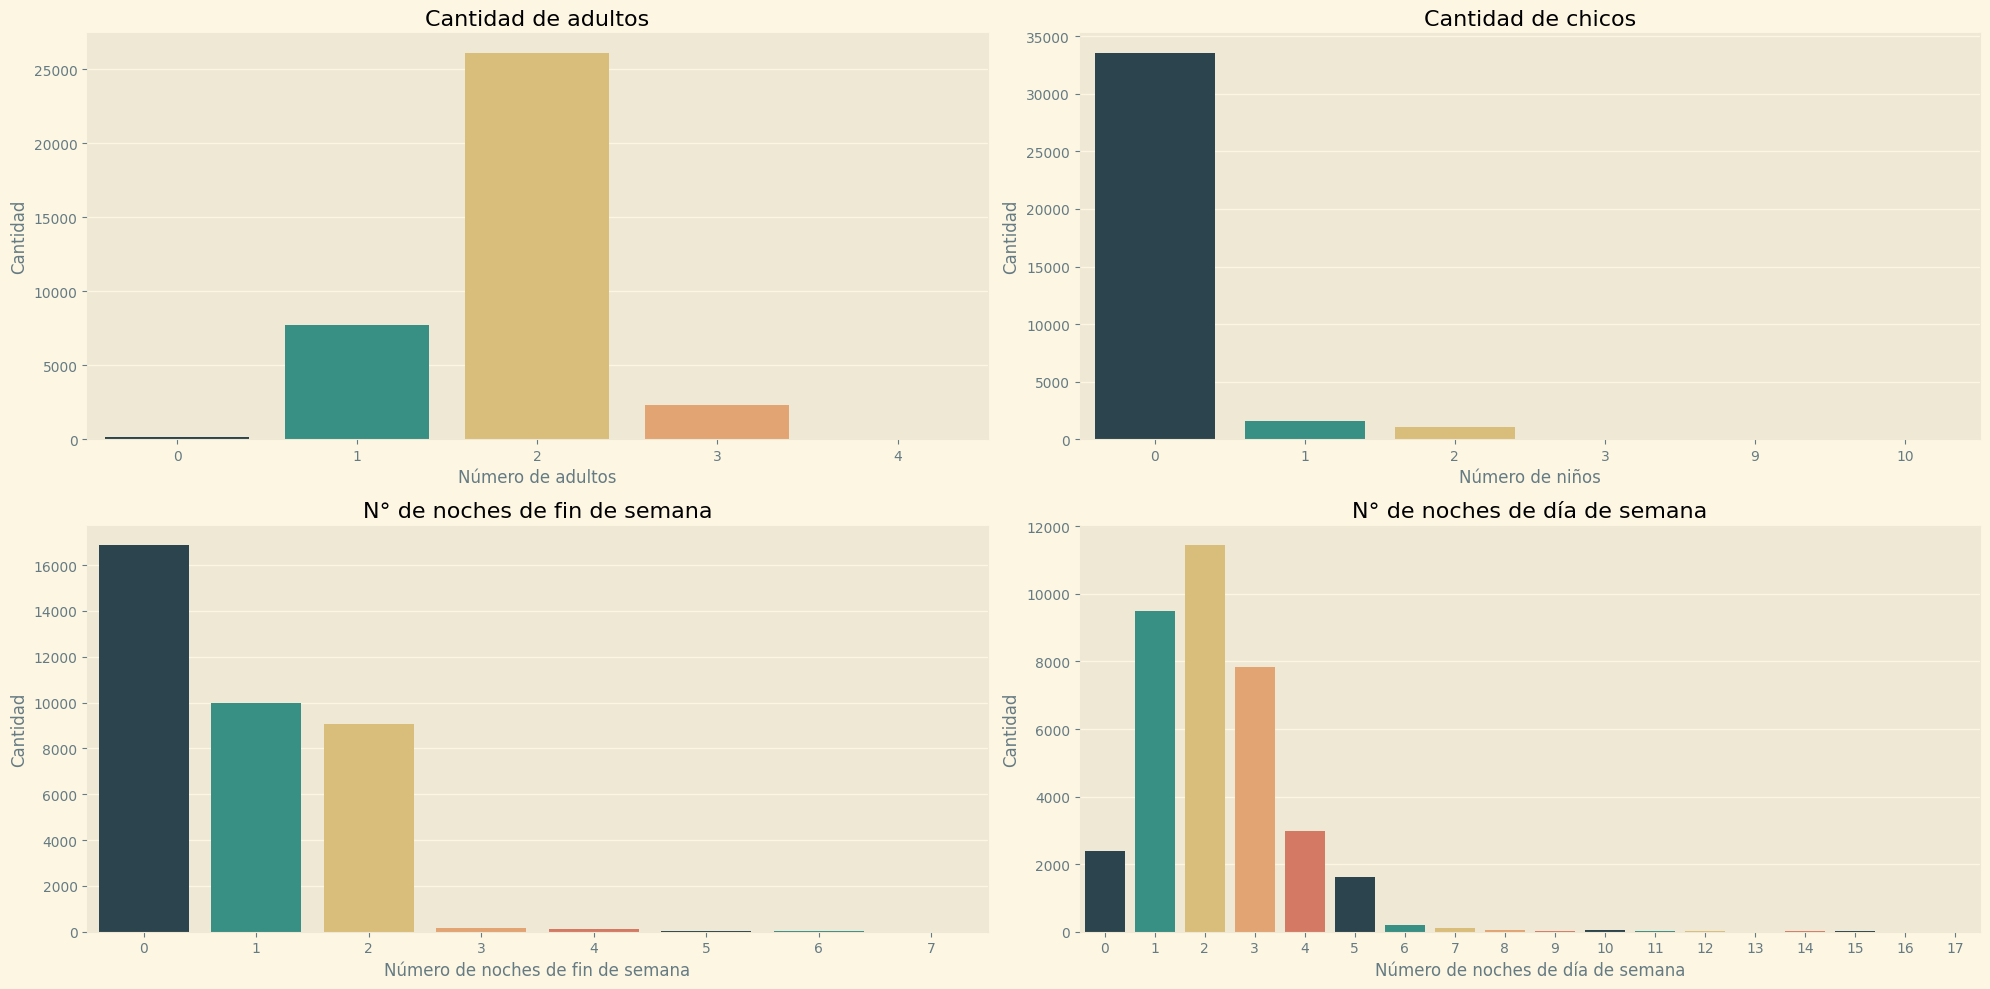

In [75]:

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.gca().set_title('Cantidad de adultos')
sns.countplot(data=df_reserva_hoteles, x = 'no_of_adults', palette = paleta_colores)
plt.xlabel('Número de adultos')
plt.ylabel('Cantidad')

plt.subplot(2,2,2)
plt.gca().set_title('Cantidad de chicos')
sns.countplot(data=df_reserva_hoteles, x = 'no_of_children', palette = paleta_colores)
plt.xlabel('Número de niños')
plt.ylabel('Cantidad')

plt.subplot(2,2,3)
plt.gca().set_title('N° de noches de fin de semana')
sns.countplot(data=df_reserva_hoteles, x = 'no_of_weekend_nights', palette = paleta_colores)
plt.xlabel('Número de noches de fin de semana')
plt.ylabel('Cantidad')

plt.subplot(2,2,4)
plt.gca().set_title('N° de noches de día de semana')
sns.countplot(data=df_reserva_hoteles, x = 'no_of_week_nights', palette = paleta_colores)
plt.xlabel('Número de noches de día de semana')
plt.ylabel('Cantidad')

print('La mayor parte de los huéspedes alquilan habitaciones para dos adultos y sin chicos. \nExisten relativamente pocos registros de reservas con chicos. \nLa estadía no suele superar más de una semana.\n')

plt.tight_layout()
plt.show()

In [76]:
n_cancelaciones = df_reserva_hoteles.no_of_previous_cancellations.value_counts().sort_index()
n_cancelaciones
print(f'Número de cancelaciones prevías por huésped: \n\n{pd.DataFrame(n_cancelaciones)}\n\nPor ejemplo, cuatro huéspedes cancelaron 13 veces')

Número de cancelaciones prevías por huésped: 

    no_of_previous_cancellations
0                          35937
1                            198
2                             46
3                             43
4                             10
5                             11
6                              1
11                            25
13                             4

Por ejemplo, cuatro huéspedes cancelaron 13 veces


Huéspedes que solicitan un espacio de estacionamiento, o huéspedes que 
se han hospedado anteriormente son huéspedes que generalmente no cancelan la reserva. 
Además, los huéspedes que solicitan más solicitudes especiales son menos propensos a cancelar.



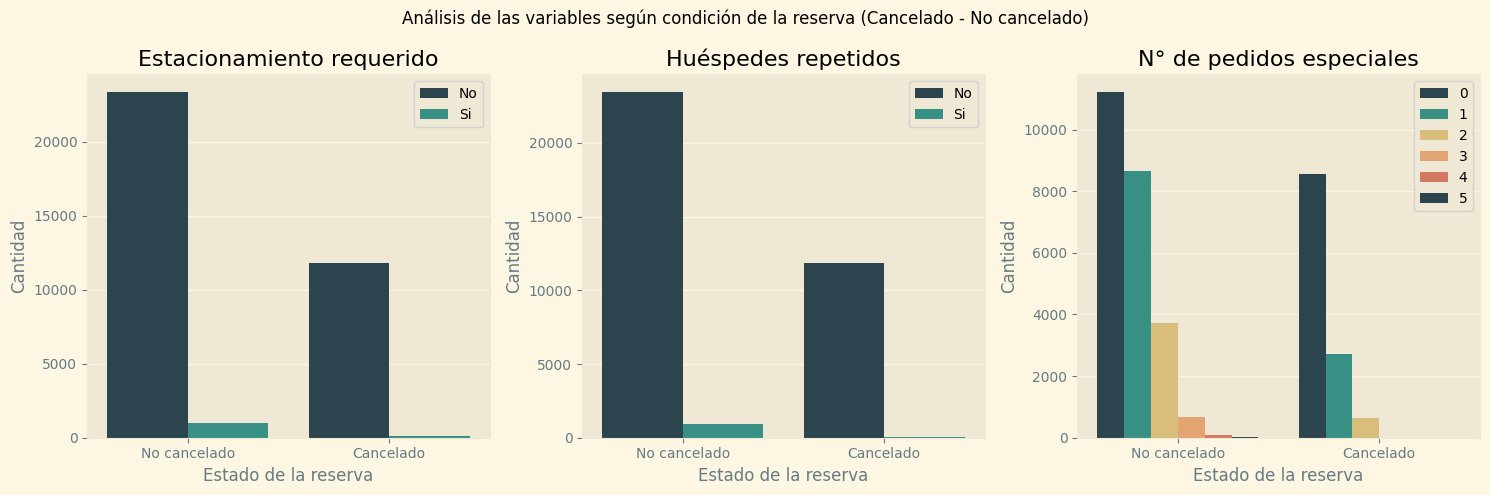

In [77]:
plt.figure(figsize = (15, 5))
plt.suptitle("Análisis de las variables según condición de la reserva (Cancelado - No cancelado)")


plt.subplot(1,3,1)
ax = sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = paleta_colores, data = df_reserva_hoteles)
plt.title('Estacionamiento requerido')
plt.legend(labels=['No', 'Si'])
ax.set_ylabel('Cantidad')
ax.set_xlabel('Estado de la reserva')
plt.xticks(ticks=[0, 1], labels=['No cancelado', 'Cancelado'])

plt.subplot(1,3,2)
ax = sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = paleta_colores, data = df_reserva_hoteles)
plt.title('Huéspedes repetidos')
plt.legend(labels=['No', 'Si'])
ax.set_ylabel('Cantidad')
ax.set_xlabel('Estado de la reserva')
plt.xticks(ticks=[0, 1], labels=['No cancelado', 'Cancelado'])


plt.subplot(1,3,3)
ax = sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = paleta_colores, data = df_reserva_hoteles)
plt.title('N° de pedidos especiales')
plt.legend(labels=['0', '1', '2', '3', '4', '5'])
ax.set_ylabel('Cantidad')
ax.set_xlabel('Estado de la reserva')
plt.xticks(ticks=[0, 1], labels=['No cancelado', 'Cancelado'])


plt.tight_layout()
print('Huéspedes que solicitan un espacio de estacionamiento, o huéspedes que \nse han hospedado anteriormente son huéspedes que generalmente no cancelan la reserva. \nAdemás, los huéspedes que solicitan más solicitudes especiales son menos propensos a cancelar.\n')

Se observan valores bajos de correlación entre las variables



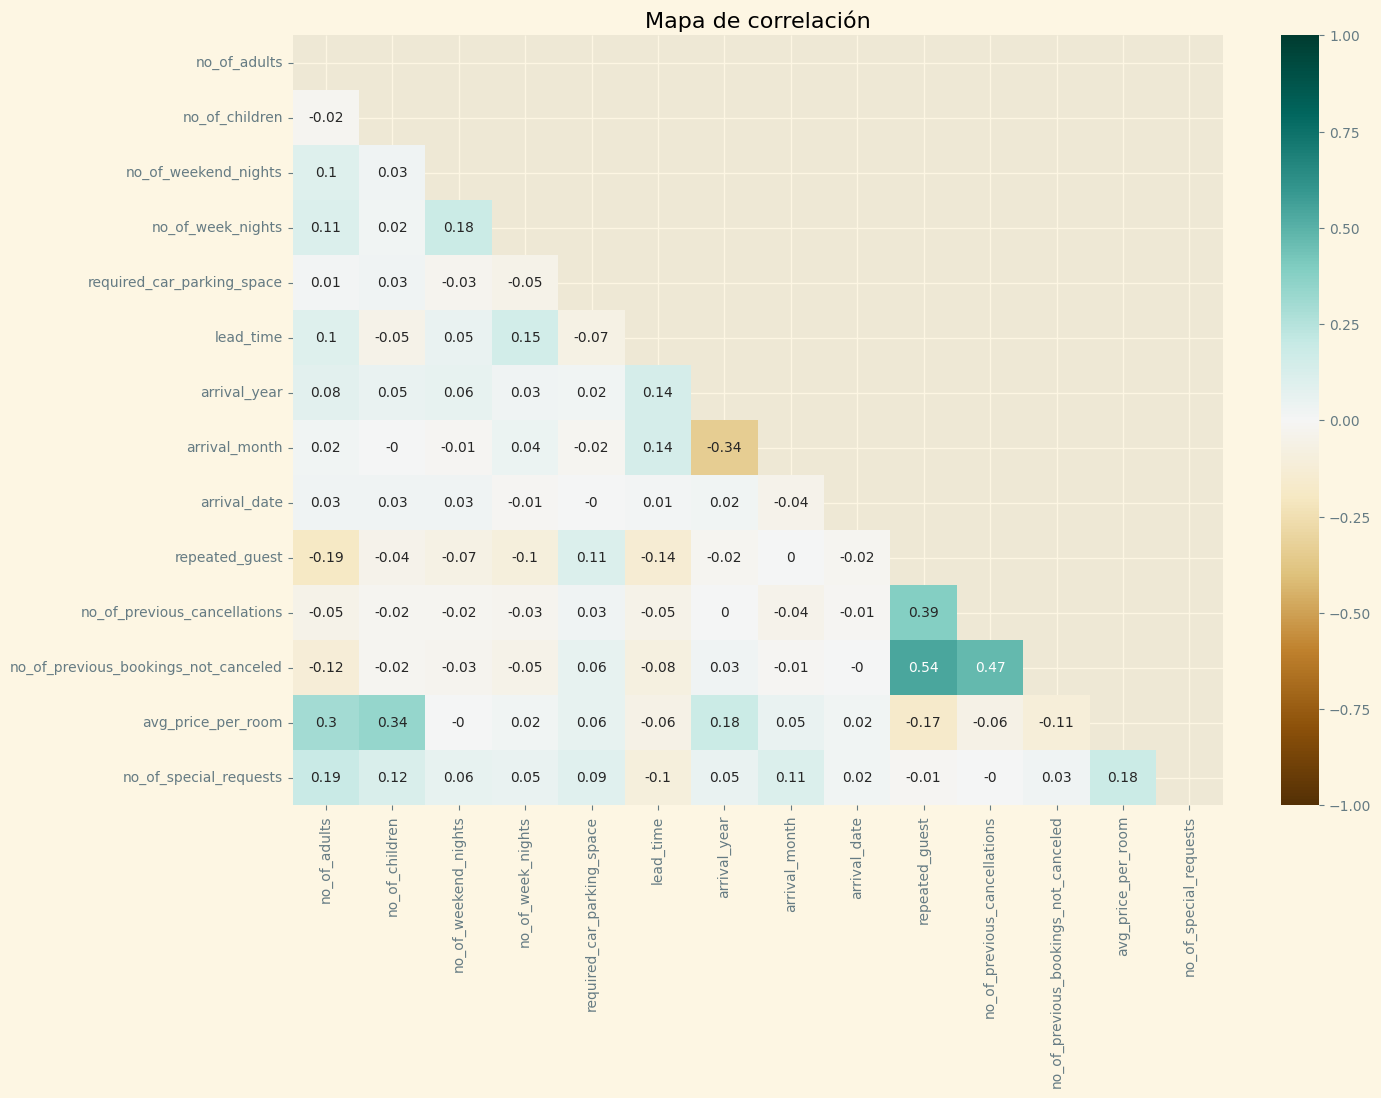

In [78]:
correlation_matrix = round(df_reserva_hoteles.corr(),2)
mask = np.triu(np.ones_like(df_reserva_hoteles.corr()))
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', mask=mask, vmin=-1, vmax=1)
plt.title('Mapa de correlación')
print('Se observan valores bajos de correlación entre las variables\n')

plt.show()

El coeficiente de correlación entre el precio promedio por habitación y el tiempo 
transcurrido desde la reserva y la llegada al hotel es: -0.06



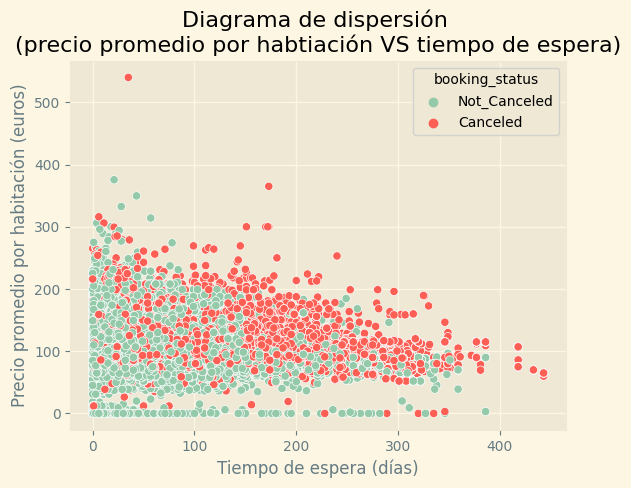

In [79]:
ax = sns.scatterplot(data=df_reserva_hoteles, x="lead_time", y="avg_price_per_room", palette=['#94c9a9', '#fe5f55'], hue = 'booking_status')
correlation_coef = df_reserva_hoteles['lead_time'].corr(df_reserva_hoteles['avg_price_per_room'])
print(f'El coeficiente de correlación entre el precio promedio por habitación y el tiempo \ntranscurrido desde la reserva y la llegada al hotel es: {correlation_coef.round(2)}\n')
plt.title('Diagrama de dispersión \n(precio promedio por habtiación VS tiempo de espera)')
ax.set_xlabel('Tiempo de espera (días)')
ax.set_ylabel('Precio promedio por habitación (euros)')



plt.show()

## Resultados



*   La cantidad de reservas canceladas fué de 11885 (32.76%)
y de 24390 (67.24%) para las reservas no canceladas para ambos años en conjunto.

*   El porcentaje de reservas canceladas en el 2017 fue del 14.75 % y en el 2018 del 36.71 %, por lo que hubo un aumento en las cancelaciones del 21.96 %

*   Se puede observar que en el 2018 aumentaron la cantidad de reservas para cada mes en comparación del año 2017. Además, no hay datos en los meses previos a Julio para el año 2017. El mes con mayor cantidad de reservas, tanto para 2017 y 2018 es octubre.


*   En el gráfico de "Cantidad de reservas por mes", si se tiene en cuenta los años 2017 y 2018 en conjunto se puede observar que hay una tendencia alcista de reservas desde enero hasta el mes de octubre y para noviembre empieza a decaer.

*   En el boxplot de precios promedios por habitación se observan valores con mediana igual a 99.45 euros. El primer cuantil (25%) es 80.3 euros y el tercer cuantil 120.0 euros. Se detectaron datos anómalos.

*   El promedio de pedidos especiales para las reservas no canceladas es 0.76 y de  0.33 para las canceladas, indicando que si el número de solicitudes especiales aumenta, es menos probable que las personas cancelen su reserva.

*   Las medidas estadísticas son mayores para los casos de las reservas canceladas que para aquellas no canceladas en el campo de precio promedio por habitación, como se observa en el histograma y en el boxplot. A modo de ejemplo, el valor para la mediana en el caso de que la reserva no haya sido cancelada es de 95.0 euros y de 108.0 euros para aquellas canceladas. Se podría confirmar con un test de hipótesis.

*   Se observa que la mayoría de los usuarios eligen el tipo de comida del plan 1 y contratan habitaciones de tipo 1, siendo la reservación  mayormente online.


*   Complementando al punto anterior, la mayor cantidad de reservas son para dos adultos y en la mayoría de los casos sin niños.



*   Como el porcentaje de los datos anómalos es relativamente chico respecto al total de registros, se decidió no excluir estos registros del análisis



*   Huéspedes que solicitan un espacio de estacionamiento, o huéspedes que
se han hospedado anteriormente son huéspedes que generalmente no cancelan la reserva.
Además, los huéspedes que solicitan más solicitudes especiales son menos propensos a cancelar.







# Implementación de un algoritmo de Machine Learning

Se aplicará sobre el set de datos el algorimto de regresión logística. Previamente se aplicará la técnica de one hot encoding a las variables categóricas y se normalizarán las variables numéricas.

Los pasos a seguir son:



*   Reemplazar los valores categoricos de la variable objetivo (booking_status) por valores numéricos
*   Aplicar la técnica de One Hot Encoding a las variables categoricas
*   Normalizar las variables numéricas
*   Entrenar un modelo con un algoritmo de aprendizaje supervisado y de clasificación





In [80]:
df_reserva_hoteles_copia = df_reserva_hoteles.copy()

##### Reemplazo los valores categoricos de la variable objetivo por valores numéricos

In [81]:
df_reserva_hoteles_copia['booking_status'] = df_reserva_hoteles_copia['booking_status'].replace({'Not_Canceled':0, 'Canceled':1}) # Reemplazo la variable objetivo por 0 y 1

##### Conversión de variables categoricas a numéricas (One Hot Encoding)

In [82]:
df_reserva_hoteles_copia = pd.get_dummies(df_reserva_hoteles_copia, drop_first=False)
# Se utiliza la técnica One Hot Encoding con la función get_dummies() de la
# biblioteca pandas para convertir cada variable categórica en una serie de
# variables ficticias binarias.

##### Normalización de las variables numéricas

In [83]:
variables_a_normalizar = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'arrival_month',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [84]:

# Creo una función para normalizar variables numéricas

def normalizar(variable):
  df_reserva_hoteles_copia[variable] = (df_reserva_hoteles_copia[variable] - df_reserva_hoteles_copia[variable].mean())/(df_reserva_hoteles_copia[variable].max()-df_reserva_hoteles_copia[variable].min())
  return df_reserva_hoteles_copia[variable]

print('Normalizamos las siguientes variables numéricas: \n')
for i in range(0, len(variables_a_normalizar)): # Normalizo sólo variables numéricas
  normalizar(variables_a_normalizar[i])

df_reserva_hoteles_copia.head()

Normalizamos las siguientes variables numéricas: 



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,0.038759,-0.010528,0.027039,-0.012018,-0.030986,0.313245,2017,0.234213,2,-0.025637,...,0,0,0,0,0,0,0,0,1,0
INN00002,0.038759,-0.010528,0.169897,0.046806,-0.030986,-0.181112,2018,0.325122,6,-0.025637,...,0,0,0,0,0,0,0,0,0,1
INN00003,-0.211241,-0.010528,0.169897,-0.070841,-0.030986,-0.190141,2018,-0.493059,28,-0.025637,...,0,0,0,0,0,0,0,0,0,1
INN00004,0.038759,-0.010528,-0.115818,-0.012018,-0.030986,0.283899,2018,-0.220332,20,-0.025637,...,0,0,0,0,0,0,0,0,0,1
INN00005,0.038759,-0.010528,0.027039,-0.070841,-0.030986,-0.084046,2018,-0.311241,11,-0.025637,...,0,0,0,0,0,0,0,0,0,1


##### Regresión Logística (Clasificación)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [86]:
X = df_reserva_hoteles_copia.drop(columns=['booking_status', 'arrival_year', 'arrival_month', 'arrival_date']) # Me quedo con todos los datos menos con la varible target
y = df_reserva_hoteles_copia['booking_status']              # Variable target

In [87]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=False) # ¿Qué creen que son los parámetros shuffle y random state?
# Shuffle es mezclar
# random_state es una forma de que si hay mezcla, sea siempre de la misma manera.

In [88]:
modelo_lr = LogisticRegression(max_iter=1000, n_jobs=-1)  # Instanciamos el objeto de tipo LogisticRegression.
modelo_lr.fit(X_train, y_train)  # Ajustamos el modelo con los datos de entrenamiento

#n_jobs se utiliza para especificar el número de núcleos de procesador que se deben utilizar para ajustar el modelo de regresión logística
# si se pone -1 se utilizan todos los núcleos disponibles

# max_iter controla el número máximo de iteraciones permitidas para que el algoritmo de regresión logística converja y encuentre la solución.
# Por defecto, este valor es 100

LogisticRegression(max_iter=1000, n_jobs=-1)

In [89]:
# Obtenemos las predicciones del modelo con X_test

preds = modelo_lr.predict(X_test)

In [90]:
print(f'La precisión del modelo con los parametros elegidos es de {round(metrics.accuracy_score(y_test, preds),3)}')
# (preds == y_test).sum()/y_test.count()

La precisión del modelo con los parametros elegidos es de 0.792


In [91]:
print(f'Se podría usar el f1_score como métrica ya que los datos de la variable objetivo están desbalanceados:\n \n{y.value_counts()}')

Se podría usar el f1_score como métrica ya que los datos de la variable objetivo están desbalanceados:
 
0    24390
1    11885
Name: booking_status, dtype: int64


In [92]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      7302
           1       0.73      0.57      0.64      3581

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.78     10883



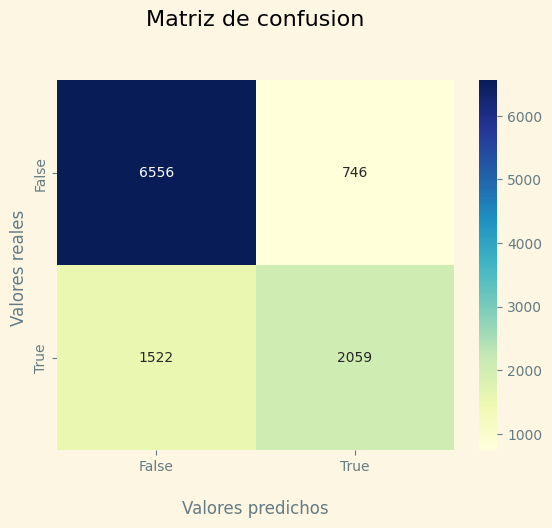

In [93]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(cf_matrix, annot=True, cmap='YlGnBu', fmt='d')
ax.set_title('Matriz de confusion\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Resultados de la regresión logística:


En la diagonal de la matriz de confusión se encuentran los valores acertados por el modelo.

En el caso de que el modelo predijo que no iba a suceder una cancelación en la reserva y efectivamente no se canceló la reserva, presenta la mayor cantidad de aciertos (False - False). Esto puede deberse también a que la variable objetivo está desbalanceada. Hay muchos más registros en donde no hubo cancelaciones que en donde si las hubo.

Por otro lado, de las metricas se puede destacar f1_score ya que combina la precision y el recall (más representativas de variable target desbalanceadas). Para mejorar el modelo se podría dividir el dataset en 3 partes, una parte para training, otra para la validación y otra para el test. De esta manera se podrían elegir los hiperparametros que mejor funcionen a partir de la validación del modelo y evitar el sobreajuste del modelo.